In [1]:
import pandas as pd
df = pd.read_csv("cph_pop_and_access_1k.csv")
df.head()

,id,lon,lat,population_density,avg_restaurant_dist,avg_bar_dist,avg_school_dist,avg_toilets_dist,avg_college_dist,avg_hospital_dist
0,55246,12.527917,55.695417,8509.044922,826.561404,920.052632,1000.000000,939.964912,1000.0,813.596491
1,55247,12.536250,55.695417,11358.980469,535.344828,590.942529,904.540230,600.655172,1000.0,963.563218
2,55248,12.544583,55.695417,12426.899414,181.544304,177.734177,496.367089,341.354430,1000.0,1000.000000
3,55249,12.552917,55.695417,12974.911133,157.525773,225.360825,759.319588,401.371134,1000.0,1000.000000
4,55250,12.561250,55.695417,9767.416016,222.821429,221.107143,991.223214,186.000000,1000.0,1000.000000


In [3]:
user_selected_amenities = ["avg_restaurant_dist", "avg_bar_dist", "avg_toilets_dist"]
df["avg_user_selection"] = (df[user_selected_amenities[0]] + df[user_selected_amenities[1]] + df[user_selected_amenities[2]])/len(user_selected_amenities)

In [4]:
sample = df[["population_density", "avg_user_selection"]]
sample = sample.fillna(1000)
sample.head()

,population_density,avg_user_selection
0,8509.044922,895.526316
1,11358.980469,575.647510
2,12426.899414,233.544304
3,12974.911133,261.419244
4,9767.416016,209.976190


In [5]:
# Scale(normalize) the data attributes between 0-1

from sklearn import preprocessing
import pandas as pd
scaler = preprocessing.MinMaxScaler()
names = sample.columns
d = scaler.fit_transform(sample)
scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

,population_density,avg_user_selection
0,0.642317,0.882342
1,0.858345,0.522096
2,0.939294,0.136821
3,0.980834,0.168214
4,0.737703,0.110279


In [9]:
# Transitioning of avg_user_selection column from average distance to average accesibility 

scaled_df["avg_user_selection"] = abs(scaled_df["avg_user_selection"] - 1)
scaled_df.head()

,population_density,avg_user_selection
0,0.642317,0.117658
1,0.858345,0.477904
2,0.939294,0.863179
3,0.980834,0.831786
4,0.737703,0.889721


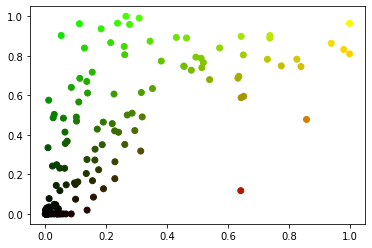

In [10]:
# assigning distinct colors on each quadrant

import numpy as np
import matplotlib.pyplot as plt 
# points = sample.to_numpy()
points = scaled_df.to_numpy()

R = (points[:,0] - points[:,0].min())/(points[:,0].max()-points[:,0].min())
G = (points[:,1] - points[:,1].min())/(points[:,1].max()-points[:,1].min())
B = np.zeros(R.shape)

clrs = np.column_stack((R,G,B))

plt.scatter(points[:,0],points[:,1],color=clrs)
plt.show()

In [11]:
# Extracting RGB color values
clrs_df = pd.DataFrame(clrs)

In [12]:
clrs_df['rgb'] = clrs_df[clrs_df.columns[0:]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)
clrs_df['rgb'] = 'rgb(' + clrs_df['rgb'].astype(str) + ')'
clrs_df.head()

,0,1,2,rgb
0,0.642317,0.117658,0.0,"rgb(0.6423174080767954,0.11765778558301421,0.0)"
1,0.858345,0.477904,0.0,"rgb(0.858345031890396,0.47790383489314336,0.0)"
2,0.939294,0.863179,0.0,"rgb(0.9392942282448021,0.8631789014059799,0.0)"
3,0.980834,0.831786,0.0,"rgb(0.9808339990488758,0.8317862711885698,0.0)"
4,0.737703,0.889721,0.0,"rgb(0.7377030449753611,0.8897212028927661,0.0)"


In [16]:
# Adding scaled data & rgb columns in the original data frame 

df['scaled_pop'] = scaled_df['population_density']
df['scaled_acc'] = scaled_df['avg_user_selection']
df['rgb'] = clrs_df['rgb']

In [17]:
import plotly.express as px
 
px.set_mapbox_access_token(open(".mapbox_token").read())
fig = px.scatter_mapbox(
        df, 
        lon="lon", lat="lat", 
        hover_data=["population_density"] + user_selected_amenities,
        color="rgb",
        color_discrete_map="identity",
        # color_continuous_scale="Viridis_r", #viridis reversed
        mapbox_style="outdoors",
    )

fig.show()